In [19]:
import pandas as pd


In [20]:

# Updated data for more colleges in NYC with train station names and public/private status
data = {
    "college_name": [
        "Baruch College", "Brooklyn College", "City College of New York (CCNY)", 
        "College of Staten Island (CSI)", "Hunter College", "John Jay College of Criminal Justice", 
        "Lehman College", "Medgar Evers College", "New York City College of Technology (City Tech)", 
        "Queens College", "York College", "Borough of Manhattan Community College (BMCC)", 
        "Bronx Community College (BCC)", "Guttman Community College", "Hostos Community College", 
        "Kingsborough Community College", "LaGuardia Community College", "Queensborough Community College", 
        "Columbia University", "New York University (NYU)", "Fordham University", 
        "The New School", "Pace University", "St. John's University", 
        "Pratt Institute", "School of Visual Arts", "Yeshiva University", 
        "The Juilliard School", "Barnard College", "Manhattan College", 
        "St. Francis College", "LIU Brooklyn", "Vaughn College of Aeronautics and Technology"
    ],
    "train_station_name": [
        "23rd Street", "Flatbush Avenue", "137th Street - City College", 
        "St. George", "68th Street - Hunter College", "59th Street - Columbus Circle", 
        "Bedford Park Blvd", "Franklin Avenue", "Jay Street - MetroTech", 
        "Flushing - Main Street", "Jamaica Center", "Chambers Street", 
        "Burnside Avenue", "34th Street - Herald Square", "149th Street - Grand Concourse", 
        "Sheepshead Bay", "33rd Street - Rawson Street", "Bayside", 
        "116th Street - Columbia University", "8th Street - NYU", "Fordham Road", 
        "14th Street - Union Square", "Fulton Street", "Jamaica - Van Wyck", 
        "Clinton - Washington Avenues", "23rd Street", "181st Street", 
        "66th Street - Lincoln Center", "116th Street - Columbia University", "Van Cortlandt Park - 242nd Street", 
        "Borough Hall", "Nevins Street", "Astoria - Ditmars Blvd"
    ],
    "type": [
        "Public", "Public", "Public", "Public", "Public", "Public", 
        "Public", "Public", "Public", "Public", "Public", "Public", 
        "Public", "Public", "Public", "Public", "Public", "Public", 
        "Private", "Private", "Private", "Private", "Private", "Private", 
        "Private", "Private", "Private", "Private", "Private", "Private", 
        "Private", "Private", "Private"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV

df.to_csv('school_stations_more.csv', index=False)



PermissionError: [Errno 13] Permission denied: 'school_stations_more.csv'

In [21]:
evasion_df = pd.read_csv('fare_evasion_basic.csv')

evasion_df['station'] = evasion_df['station'].str.strip()

print("Column names:", evasion_df.columns)
evasion_df.info()



Column names: Index(['station', 'a_teen', 'a_college', 'a_adult', 'a_mid', 'a_old',
       'a_unkown', 'r_native', 'r_asian', 'r_black', 'r_latino', 'r_unknown',
       'r_white', 'sex_f', 's_m', 'sex_u', 'total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   station    318 non-null    object
 1   a_teen     318 non-null    int64 
 2   a_college  318 non-null    int64 
 3   a_adult    318 non-null    int64 
 4   a_mid      318 non-null    int64 
 5   a_old      318 non-null    int64 
 6   a_unkown   318 non-null    int64 
 7   r_native   318 non-null    int64 
 8   r_asian    318 non-null    int64 
 9   r_black    318 non-null    int64 
 10  r_latino   318 non-null    int64 
 11  r_unknown  318 non-null    int64 
 12  r_white    318 non-null    int64 
 13  sex_f      318 non-null    int64 
 14  s_m        318 non-null    in

In [22]:


df_sorted = evasion_df.sort_values(by='station', ascending=True)
df_sorted.to_csv('sorted_stations.csv', index=False)

In [23]:
school_evasion = pd.read_csv('school_stations_evasion.csv')
school_evasion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   station    30 non-null     object
 1   a_teen     30 non-null     int64 
 2   a_college  30 non-null     int64 
 3   a_adult    30 non-null     int64 
 4   a_mid      30 non-null     int64 
 5   a_old      30 non-null     int64 
 6   a_unkown   30 non-null     int64 
 7   r_native   30 non-null     int64 
 8   r_asian    30 non-null     int64 
 9   r_black    30 non-null     int64 
 10  r_latino   30 non-null     int64 
 11  r_unknown  30 non-null     int64 
 12  r_white    30 non-null     int64 
 13  sex_f      30 non-null     int64 
 14  s_m        30 non-null     int64 
 15  sex_u      30 non-null     int64 
 16  total      30 non-null     int64 
 17  public     30 non-null     int64 
 18  cc         30 non-null     int64 
 19  private    30 non-null     int64 
dtypes: int64(19), object(1)
memory usa

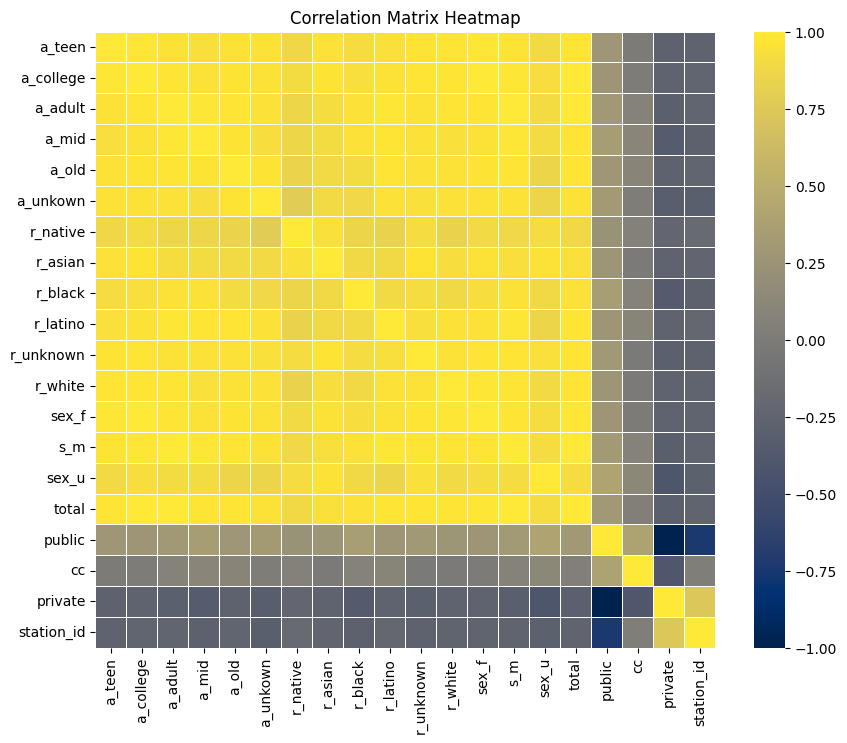

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns


#converting station to int ids
station_ids = pd.factorize(school_evasion['station'])[0]
school_evasion['station_id'] = station_ids
school_evasion = school_evasion.drop(columns=['station'])



corr_matrix = school_evasion.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='cividis', linewidths=0.5)

# Show the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

In [65]:
# pip install pandas
# pip install sodapy

from sodapy import Socrata
from passwords import *

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ny.gov", API_TOKEN)

# Define the query parameters
stations = [
    "23 St (F,M)",
    "23 St (6)",
    "Flatbush Av-Brooklyn College (2,5)",
    "137 St-City College (1)",
    "68 St-Hunter College (6)",
    "59 St-Columbus Circle (A,B,C,D,1)",
    "Bedford Park Blvd (B,D)",  # Broader query without special characters or abbreviations
    "Bedford Park Blvd-Lehman College (4)",
    "Franklin Av (2,3,4,5)/Botanic Garden (S)",
    "President St-Medgar Evers College (2,5)",
    "Jay St-MetroTech (A,C,F,R)",  # Broader query for Jay St-Borough Hall
    "Flushing Av (G)",
    "Jamaica Center-Parsons/Archer (E,J,Z)",
    "Chambers St (1,2,3)",
    "Burnside Av (4)",
    "149 St-Grand Concourse (2,4,5)",
    "Sheepshead Bay (B,Q)",
    "33 St (6)",
    "116 St-Columbia University (1)",
    "8 St-NYU (R,W)",
    "Fordham Rd (B,D)",
    "14 St-Union Sq (L,N,Q,R,W,4,5,6)",
    "Fulton St (A,C,J,Z,2,3,4,5)",
    "Clinton-Washington Avs (G)",
    "181 St (1)",
    "66 St-Lincoln Center (1)",
    "Van Cortlandt Park-242 St (1)",
    "Court St (R)/Borough Hall (2,3,4,5)",
    "Nevins St (2,3,4,5)",
    "Astoria-Ditmars Blvd (N,W)"
]

start_date = '2023-01-01'
end_date = '2024-12-31'

ridership = []

for station_complex in stations:
    print("doing ", station_complex)
    query = f"station_complex='{station_complex}' AND transit_timestamp >= '{start_date}' AND transit_timestamp <= '{end_date}'"

    # Fetch the filtered data with a limit of 50,000
    results = client.get("wujg-7c2s", where=query, limit=1000)

    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)

    # Convert the transit_timestamp to datetime
    results_df['transit_timestamp'] = pd.to_datetime(results_df['transit_timestamp'])

    # Sort the DataFrame by transit_timestamp
    results_df = results_df.sort_values(by='transit_timestamp')

    # Add a new column for the row number
    results_df['row_number'] = range(1, len(results_df) + 1)

    # Convert ridership to numeric (in case it's not)
    results_df['ridership'] = pd.to_numeric(results_df['ridership'], errors='coerce')

    # Sum the ridership
    total_ridership = results_df['ridership'].sum()

    print(f"Total ridership from 2023: {total_ridership}")\

    results_df

    ridership.append(total_ridership)

for each in ridership:
    print(each)
    print(", ")



doing  23 St (F,M)
Total ridership from 2023: 107869.0
doing  23 St (6)
Total ridership from 2023: 126871.0
doing  Flatbush Av-Brooklyn College (2,5)
Total ridership from 2023: 77457.0
doing  137 St-City College (1)
Total ridership from 2023: 53195.0
doing  68 St-Hunter College (6)
Total ridership from 2023: 138516.0
doing  59 St-Columbus Circle (A,B,C,D,1)
Total ridership from 2023: 285037.0
doing  Bedford Park Blvd (B,D)
Total ridership from 2023: 25419.0
doing  Bedford Park Blvd-Lehman College (4)
Total ridership from 2023: 25574.0
doing  Franklin Av (2,3,4,5)/Botanic Garden (S)
Total ridership from 2023: 65288.0
doing  President St-Medgar Evers College (2,5)
Total ridership from 2023: 17876.0
doing  Jay St-MetroTech (A,C,F,R)
Total ridership from 2023: 158399.0
doing  Flushing Av (G)
Total ridership from 2023: 15451.0
doing  Jamaica Center-Parsons/Archer (E,J,Z)
Total ridership from 2023: 113281.0
doing  Chambers St (1,2,3)
Total ridership from 2023: 88301.0
doing  Burnside Av (4)
